# Data Pre-processing and SMOTE (Handling Imbalance)

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")

## Importing the Dataset and Adding result column

In [2]:
l1 = pd.read_csv("FinalDataset/URL/Benign_list_big_final.csv", header=None)
l1

0
0      http://1337x.to/torrent/1048648/American-Snipe...
1      http://1337x.to/torrent/1110018/Blackhat-2015-...
2      http://1337x.to/torrent/1122940/Blackhat-2015-...
3      http://1337x.to/torrent/1124395/Fast-and-Furio...
4      http://1337x.to/torrent/1145504/Avengers-Age-o...
...                                                  ...
35373  https://lastpass.com/signup2.php?ac=1&from_uri...
35374  https://lastpass.com/signup2.php?ac=1&from_uri...
35375  https://lastpass.com/signup2.php?ac=1&from_uri...
35376  https://lastpass.com/signup2.php?ac=1&from_uri...
35377  https://asana.com/guide/videos/%22//fast.wisti...

[35378 rows x 1 columns]

In [3]:
l1['result'] = [0 for _ in range(l1.shape[0])]
l1

0  result
0      http://1337x.to/torrent/1048648/American-Snipe...       0
1      http://1337x.to/torrent/1110018/Blackhat-2015-...       0
2      http://1337x.to/torrent/1122940/Blackhat-2015-...       0
3      http://1337x.to/torrent/1124395/Fast-and-Furio...       0
4      http://1337x.to/torrent/1145504/Avengers-Age-o...       0
...                                                  ...     ...
35373  https://lastpass.com/signup2.php?ac=1&from_uri...       0
35374  https://lastpass.com/signup2.php?ac=1&from_uri...       0
35375  https://lastpass.com/signup2.php?ac=1&from_uri...       0
35376  https://lastpass.com/signup2.php?ac=1&from_uri...       0
35377  https://asana.com/guide/videos/%22//fast.wisti...       0

[35378 rows x 2 columns]

In [4]:
l2 = pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l3 = pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [1 for _ in range(l3.shape[0])]
l4 = pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [1 for _ in range(l4.shape[0])]
l5 = pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [1 for _ in range(l5.shape[0])]

In [5]:
data = [l1,l2,l3,l4,l5]
dataset = pd.concat(data, ignore_index=True)
dataset = dataset.rename({0: 'url'}, axis=1)
dataset

url  result
0       http://1337x.to/torrent/1048648/American-Snipe...       0
1       http://1337x.to/torrent/1110018/Blackhat-2015-...       0
2       http://1337x.to/torrent/1122940/Blackhat-2015-...       0
3       http://1337x.to/torrent/1124395/Fast-and-Furio...       0
4       http://1337x.to/torrent/1145504/Avengers-Age-o...       0
...                                                   ...     ...
165361    http://archive.salisburyjournal.co.uk/2001/3/7/       1
165362  http://astore.amazon.co.uk/allezvinsfrenchr/de...       1
165363  http://archive.thisischeshire.co.uk/2000/1/14/...       1
165364  http://applerugs.co.uk/rugs/product_info.php?p...       1
165365  http://allgirltogaparty.co.uk/gallery2/main.ph...       1

[165366 rows x 2 columns]

In [6]:
#dataset.to_csv('urls.csv')

In [7]:
dataset.result.value_counts()

1    129988
0     35378
Name: result, dtype: int64

In [8]:
dataset['lengthOfURL'] = dataset['url'].apply(lambda i: len(str(i)))
dataset['lengthOfHostname'] = dataset['url'].apply(lambda i: len(urlparse(i).netloc))
dataset['lengthOfPath'] = dataset['url'].apply(lambda i: len(urlparse(i).path))
dataset.head()

url  result  lengthOfURL  \
0  http://1337x.to/torrent/1048648/American-Snipe...       0           83   
1  http://1337x.to/torrent/1110018/Blackhat-2015-...       0           83   
2  http://1337x.to/torrent/1122940/Blackhat-2015-...       0           83   
3  http://1337x.to/torrent/1124395/Fast-and-Furio...       0           83   
4  http://1337x.to/torrent/1145504/Avengers-Age-o...       0           83   

   lengthOfHostname  lengthOfPath  
0                 8            68  
1                 8            68  
2                 8            68  
3                 8            68  
4                 8            68

In [9]:
urlparse('http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/').netloc

'1337x.to'

In [10]:
urlparse('http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/').path

'/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/'

In [11]:
print(get_tld('http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/'))

to


In [12]:
dataset['tld'] = dataset['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

dataset['lengthOfTLD'] = dataset['tld'].apply(lambda i: tld_length(i))
dataset = dataset.drop(columns=['tld'])

In [13]:
def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

In [14]:
dataset['Tally(dir)'] = dataset['url'].apply(lambda i: directories(i))
dataset['Tally(digits)']= dataset['url'].apply(lambda i: digit(i))
dataset['Tally(letters)']= dataset['url'].apply(lambda i: letter(i))
dataset['IP'] = dataset['url'].apply(lambda i: ip_address(i))
dataset['Tally(.)'] = dataset['url'].apply(lambda i: i.count('.'))
dataset['Tally(-)'] = dataset['url'].apply(lambda i: i.count('-'))
dataset['Tally(@)'] = dataset['url'].apply(lambda i: i.count('@'))
dataset['Tally(%)'] = dataset['url'].apply(lambda i: i.count('%'))
dataset['Tally(=)'] = dataset['url'].apply(lambda i: i.count('='))
dataset['Tally(/)'] = dataset['url'].apply(lambda i: i.count('/'))
dataset['Tally(?)'] = dataset['url'].apply(lambda i: i.count('?'))
dataset['Tally(+)'] = dataset['url'].apply(lambda i: i.count('+'))
dataset['Tally(//)'] = dataset['url'].apply(lambda i: i.count('//'))

In [18]:
dataset.describe()

result    lengthOfURL  lengthOfHostname   lengthOfPath  \
count  165366.000000  165366.000000     165366.000000  165366.000000   
mean        0.786062      95.099549         17.396641      37.595128   
std         0.410085      61.457045          7.759680      34.883335   
min         0.000000      17.000000          0.000000       0.000000   
25%         1.000000      63.000000         13.000000      10.000000   
50%         1.000000      88.000000         16.000000      24.000000   
75%         1.000000     110.000000         21.000000      59.000000   
max         1.000000    2081.000000        236.000000     732.000000   

         lengthOfTLD     Tally(dir)  Tally(digits)  Tally(letters)  \
count  165366.000000  165366.000000  165366.000000   165366.000000   
mean        3.224490       2.466934       9.141752       68.980141   
std         1.352138       1.695562      15.712669       47.243910   
min        -1.000000       0.000000       0.000000       10.000000   
25%         2.000000       1.000000       1.000000       45.000000   
50%         3.000000       2.000000       4.000000       64.000000   
75%         3.000000       3.000000      10.000000       81.000000   
max        34.000000      18.000000    1204.000000     1355.000000   

                  IP       Tally(.)       Tally(-)       Tally(@)  \
count  165366.000000  165366.000000  165366.000000  165366.000000   
mean        0.000998       2.734565       2.505969       0.001651   
std         0.031572       1.546046       3.832608       0.043196   
min         0.000000       1.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       0.000000   
50%         0.000000       3.000000       1.000000       0.000000   
75%         0.000000       3.000000       3.000000       0.000000   
max         1.000000      31.000000      87.000000       2.000000   

            Tally(%)       Tally(=)       Tally(/)       Tally(?)  \
count  165366.000000  165366.000000  165366.000000  165366.000000   
mean        1.808564       1.768580       4.544126       0.482663   
std         8.628205       2.406291       1.852006       0.566001   
min         0.000000       0.000000       2.000000       0.000000   
25%         0.000000       0.000000       3.000000       0.000000   
50%         0.000000       0.000000       4.000000       0.000000   
75%         0.000000       4.000000       5.000000       1.000000   
max       231.000000      39.000000      39.000000      18.000000   

            Tally(+)      Tally(//)  
count  165366.000000  165366.000000  
mean        0.089117       1.008133  
std         0.842380       0.113973  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max        27.000000       3.000000

In [19]:
dataset.columns

Index(['url', 'result', 'lengthOfURL', 'lengthOfHostname', 'lengthOfPath',
       'lengthOfTLD', 'Tally(dir)', 'Tally(digits)', 'Tally(letters)', 'IP',
       'Tally(.)', 'Tally(-)', 'Tally(@)', 'Tally(%)', 'Tally(=)', 'Tally(/)',
       'Tally(?)', 'Tally(+)', 'Tally(//)'],
      dtype='object')

In [43]:
vectorizer = CountVectorizer(analyzer='char')
x = vectorizer.fit_transform(dataset['url'])
x.shape

(165366, 133)

In [44]:
vectorizer.vocabulary_

{'h': 43,
 't': 55,
 'p': 51,
 ':': 25,
 '/': 14,
 '1': 16,
 '3': 18,
 '7': 22,
 'x': 59,
 '.': 13,
 'o': 50,
 'r': 53,
 'e': 40,
 'n': 49,
 '0': 15,
 '4': 19,
 '8': 23,
 '6': 21,
 'a': 36,
 'm': 48,
 'i': 44,
 'c': 38,
 '-': 12,
 's': 54,
 '2': 17,
 'd': 39,
 'l': 47,
 'v': 57,
 'b': 37,
 'k': 46,
 '5': 20,
 'u': 56,
 'w': 58,
 'f': 41,
 'g': 42,
 '9': 24,
 'y': 60,
 'q': 52,
 '?': 30,
 '=': 28,
 '_': 35,
 '&': 5,
 '%': 4,
 'z': 61,
 'j': 45,
 '+': 10,
 '(': 7,
 ')': 8,
 '[': 32,
 ']': 34,
 '@': 31,
 '!': 1,
 '|': 63,
 '*': 9,
 ';': 26,
 '{': 62,
 '}': 64,
 "'": 6,
 '~': 65,
 '#': 2,
 '\\': 33,
 'ส': 111,
 'น': 97,
 'ห': 112,
 'พ': 102,
 'ึ': 122,
 'ณ': 91,
 'ว': 109,
 'ล': 107,
 'ต': 93,
 'ฤ': 106,
 'ถ': 94,
 'ฎ': 86,
 'ฮ': 115,
 'บ': 98,
 'ศ': 110,
 'ฅ': 78,
 'ป': 99,
 'ุ': 124,
 'ฟ': 103,
 'ฝ': 101,
 'ฺ': 126,
 'ฐ': 88,
 'ด': 92,
 'ฦ': 108,
 'ท': 95,
 'ๅ': 129,
 'ฉ': 81,
 'ญ': 85,
 'ผ': 100,
 'ู': 125,
 'า': 118,
 'ะ': 116,
 '\uf1dc': 132,
 'ฬ': 113,
 'จ': 80,
 'อ': 114,
 'ไ': 128,

In [12]:
dataset.head()

url  result  lengthOfURL  \
0  http://1337x.to/torrent/1048648/American-Snipe...       0           83   
1  http://1337x.to/torrent/1110018/Blackhat-2015-...       0           83   
2  http://1337x.to/torrent/1122940/Blackhat-2015-...       0           83   
3  http://1337x.to/torrent/1124395/Fast-and-Furio...       0           83   
4  http://1337x.to/torrent/1145504/Avengers-Age-o...       0           83   

   lengthOfHostname  lengthOfPath  lengthOfTLD  Tally(dir)  Tally(digits)  \
0                 8            68            2           4             18   
1                 8            68            2           4             23   
2                 8            68            2           4             22   
3                 8            68            2           4             18   
4                 8            68            2           4             18   

   Tally(letters)  IP  Tally(.)  Tally(-)  Tally(@)  Tally(%)  Tally(=)  \
0              49   0         1         8         0         0         0   
1              43   0         1         9         0         0         0   
2              44   0         1         9         0         0         0   
3              46   0         1        11         0         0         0   
4              48   0         1         9         0         0         0   

   Tally(/)  Tally(?)  Tally(+)  Tally(//)  
0         6         0         0          1  
1         6         0         0          1  
2         6         0         0          1  
3         6         0         0          1  
4         6         0         0          1

In [13]:
#dataset.to_csv('extracted_features_0.csv')

## SMOTE Comparision

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
new_X, new_Y = sm.fit_resample(dataset.drop(['url','result'], axis=1), dataset['result'])
new_dataset = pd.concat([pd.DataFrame(new_Y), pd.DataFrame(new_X)], axis=1)

Text(0.5, 1.0, 'Classes before SMOTE')

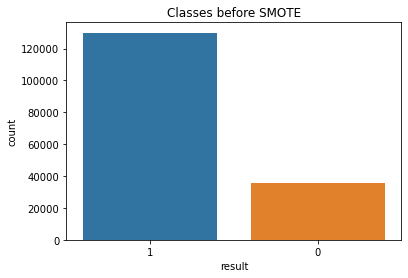

In [16]:
sns.countplot(x = 'result', data = dataset, order = dataset['result'].value_counts().index).set_title("Classes before SMOTE")

Text(0.5, 1.0, 'Classes after SMOTE')

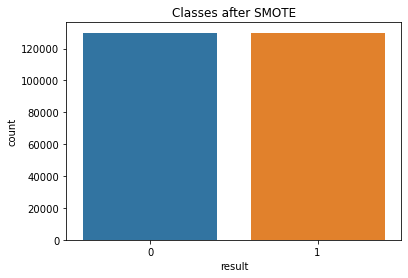

In [17]:
sns.countplot(x = 'result', data = new_dataset, order = new_dataset['result'].value_counts().index).set_title("Classes after SMOTE")

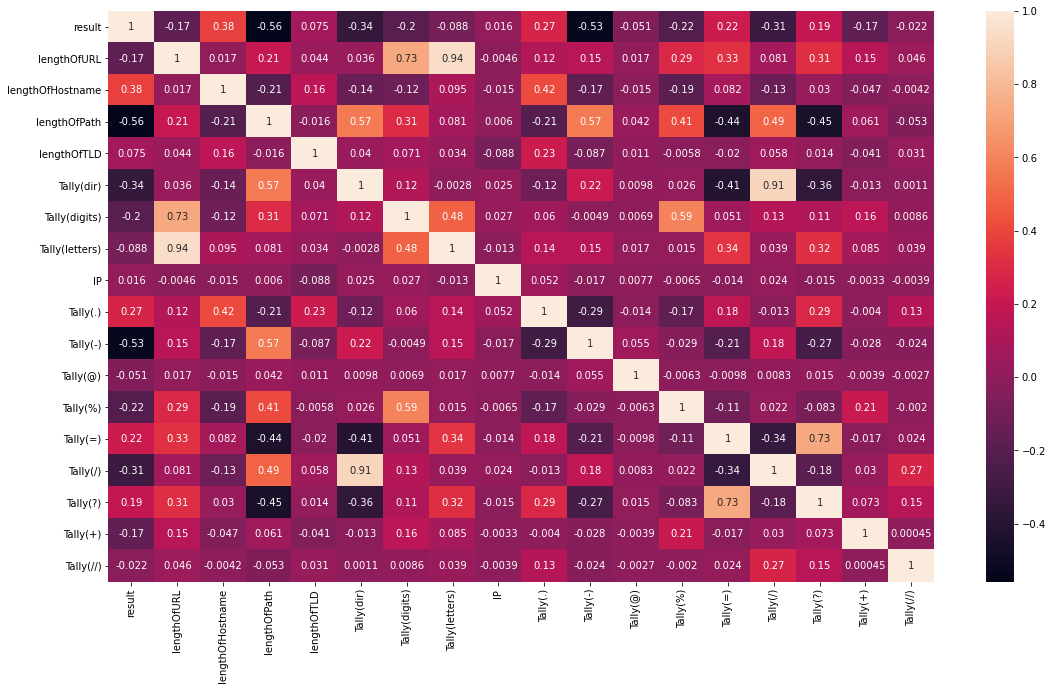

In [18]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(dataset.corr(),annot=True)
plt.show()

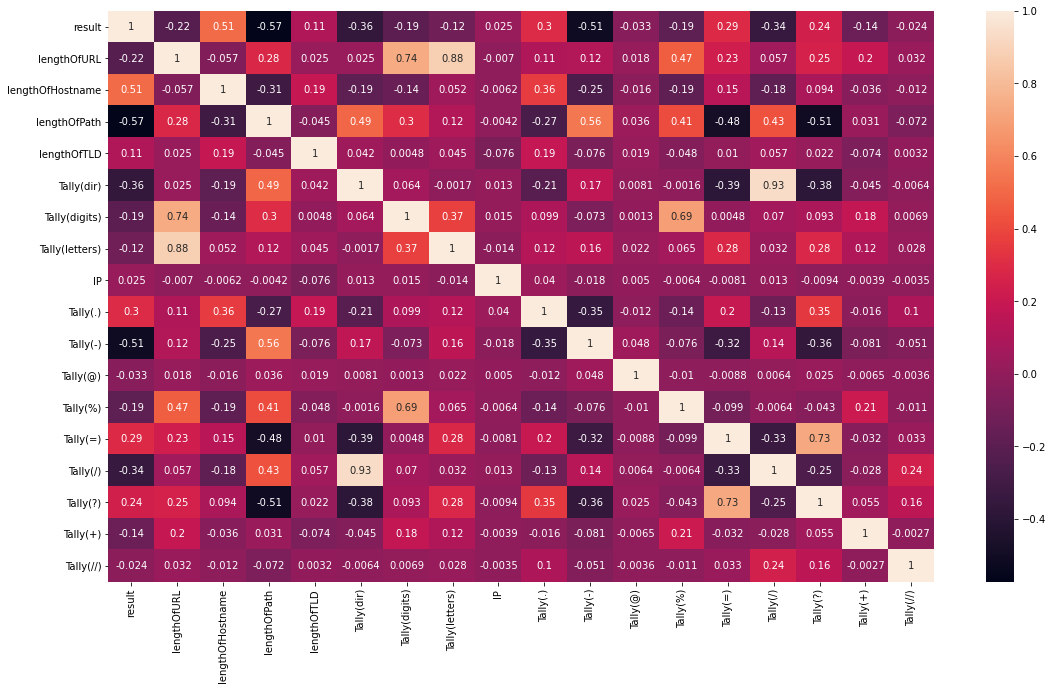

In [19]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(new_dataset.corr(),annot=True)
plt.show()

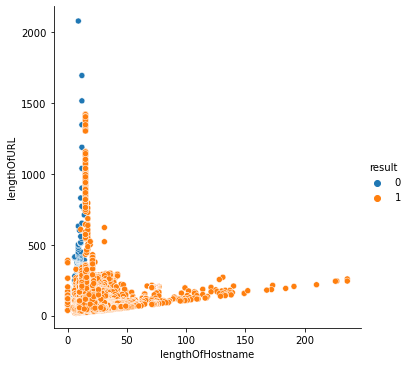

In [20]:
sns.relplot(data=dataset, x='lengthOfHostname', y='lengthOfURL', hue='result', palette='tab10', kind='scatter')

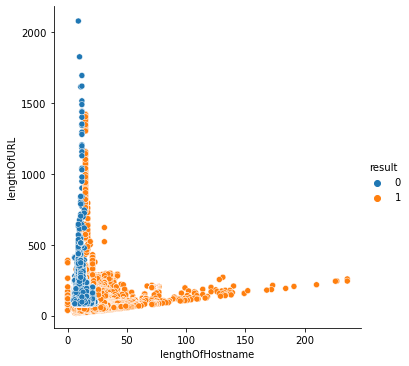

In [21]:
sns.relplot(data=new_dataset, x='lengthOfHostname', y='lengthOfURL', hue='result', palette='tab10', kind='scatter')

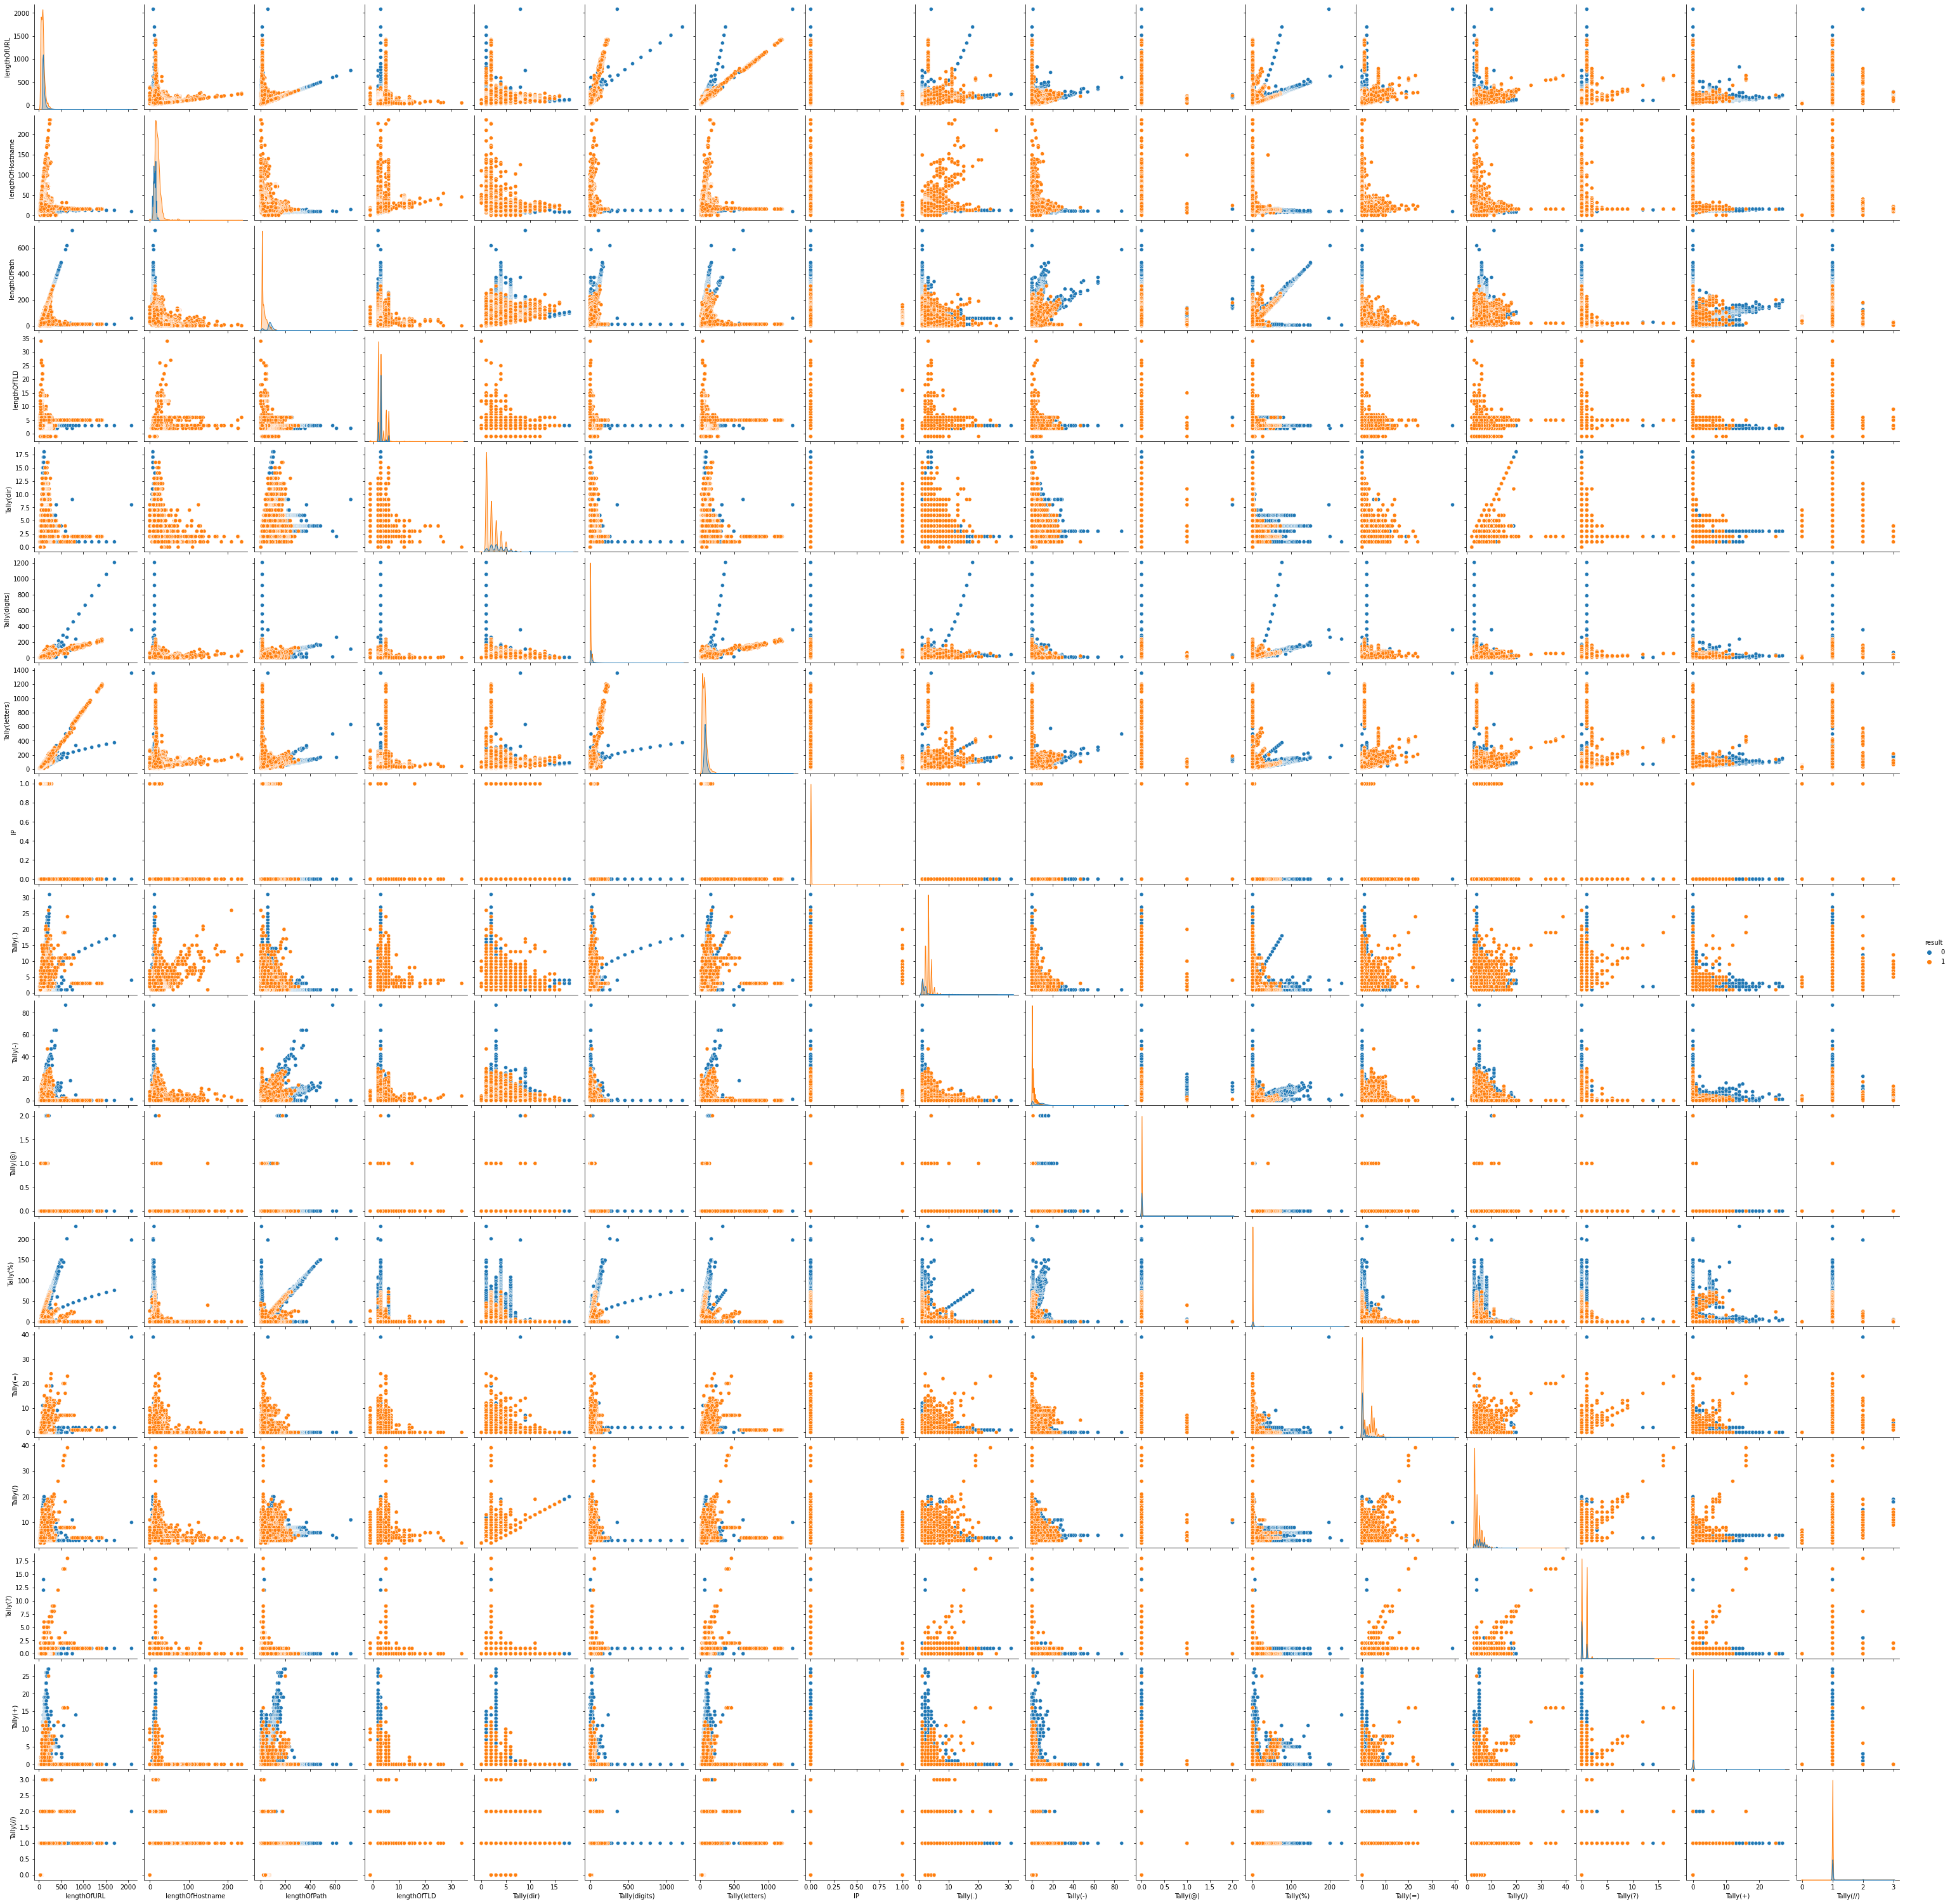

In [50]:
sns.pairplot(dataset, hue="result")

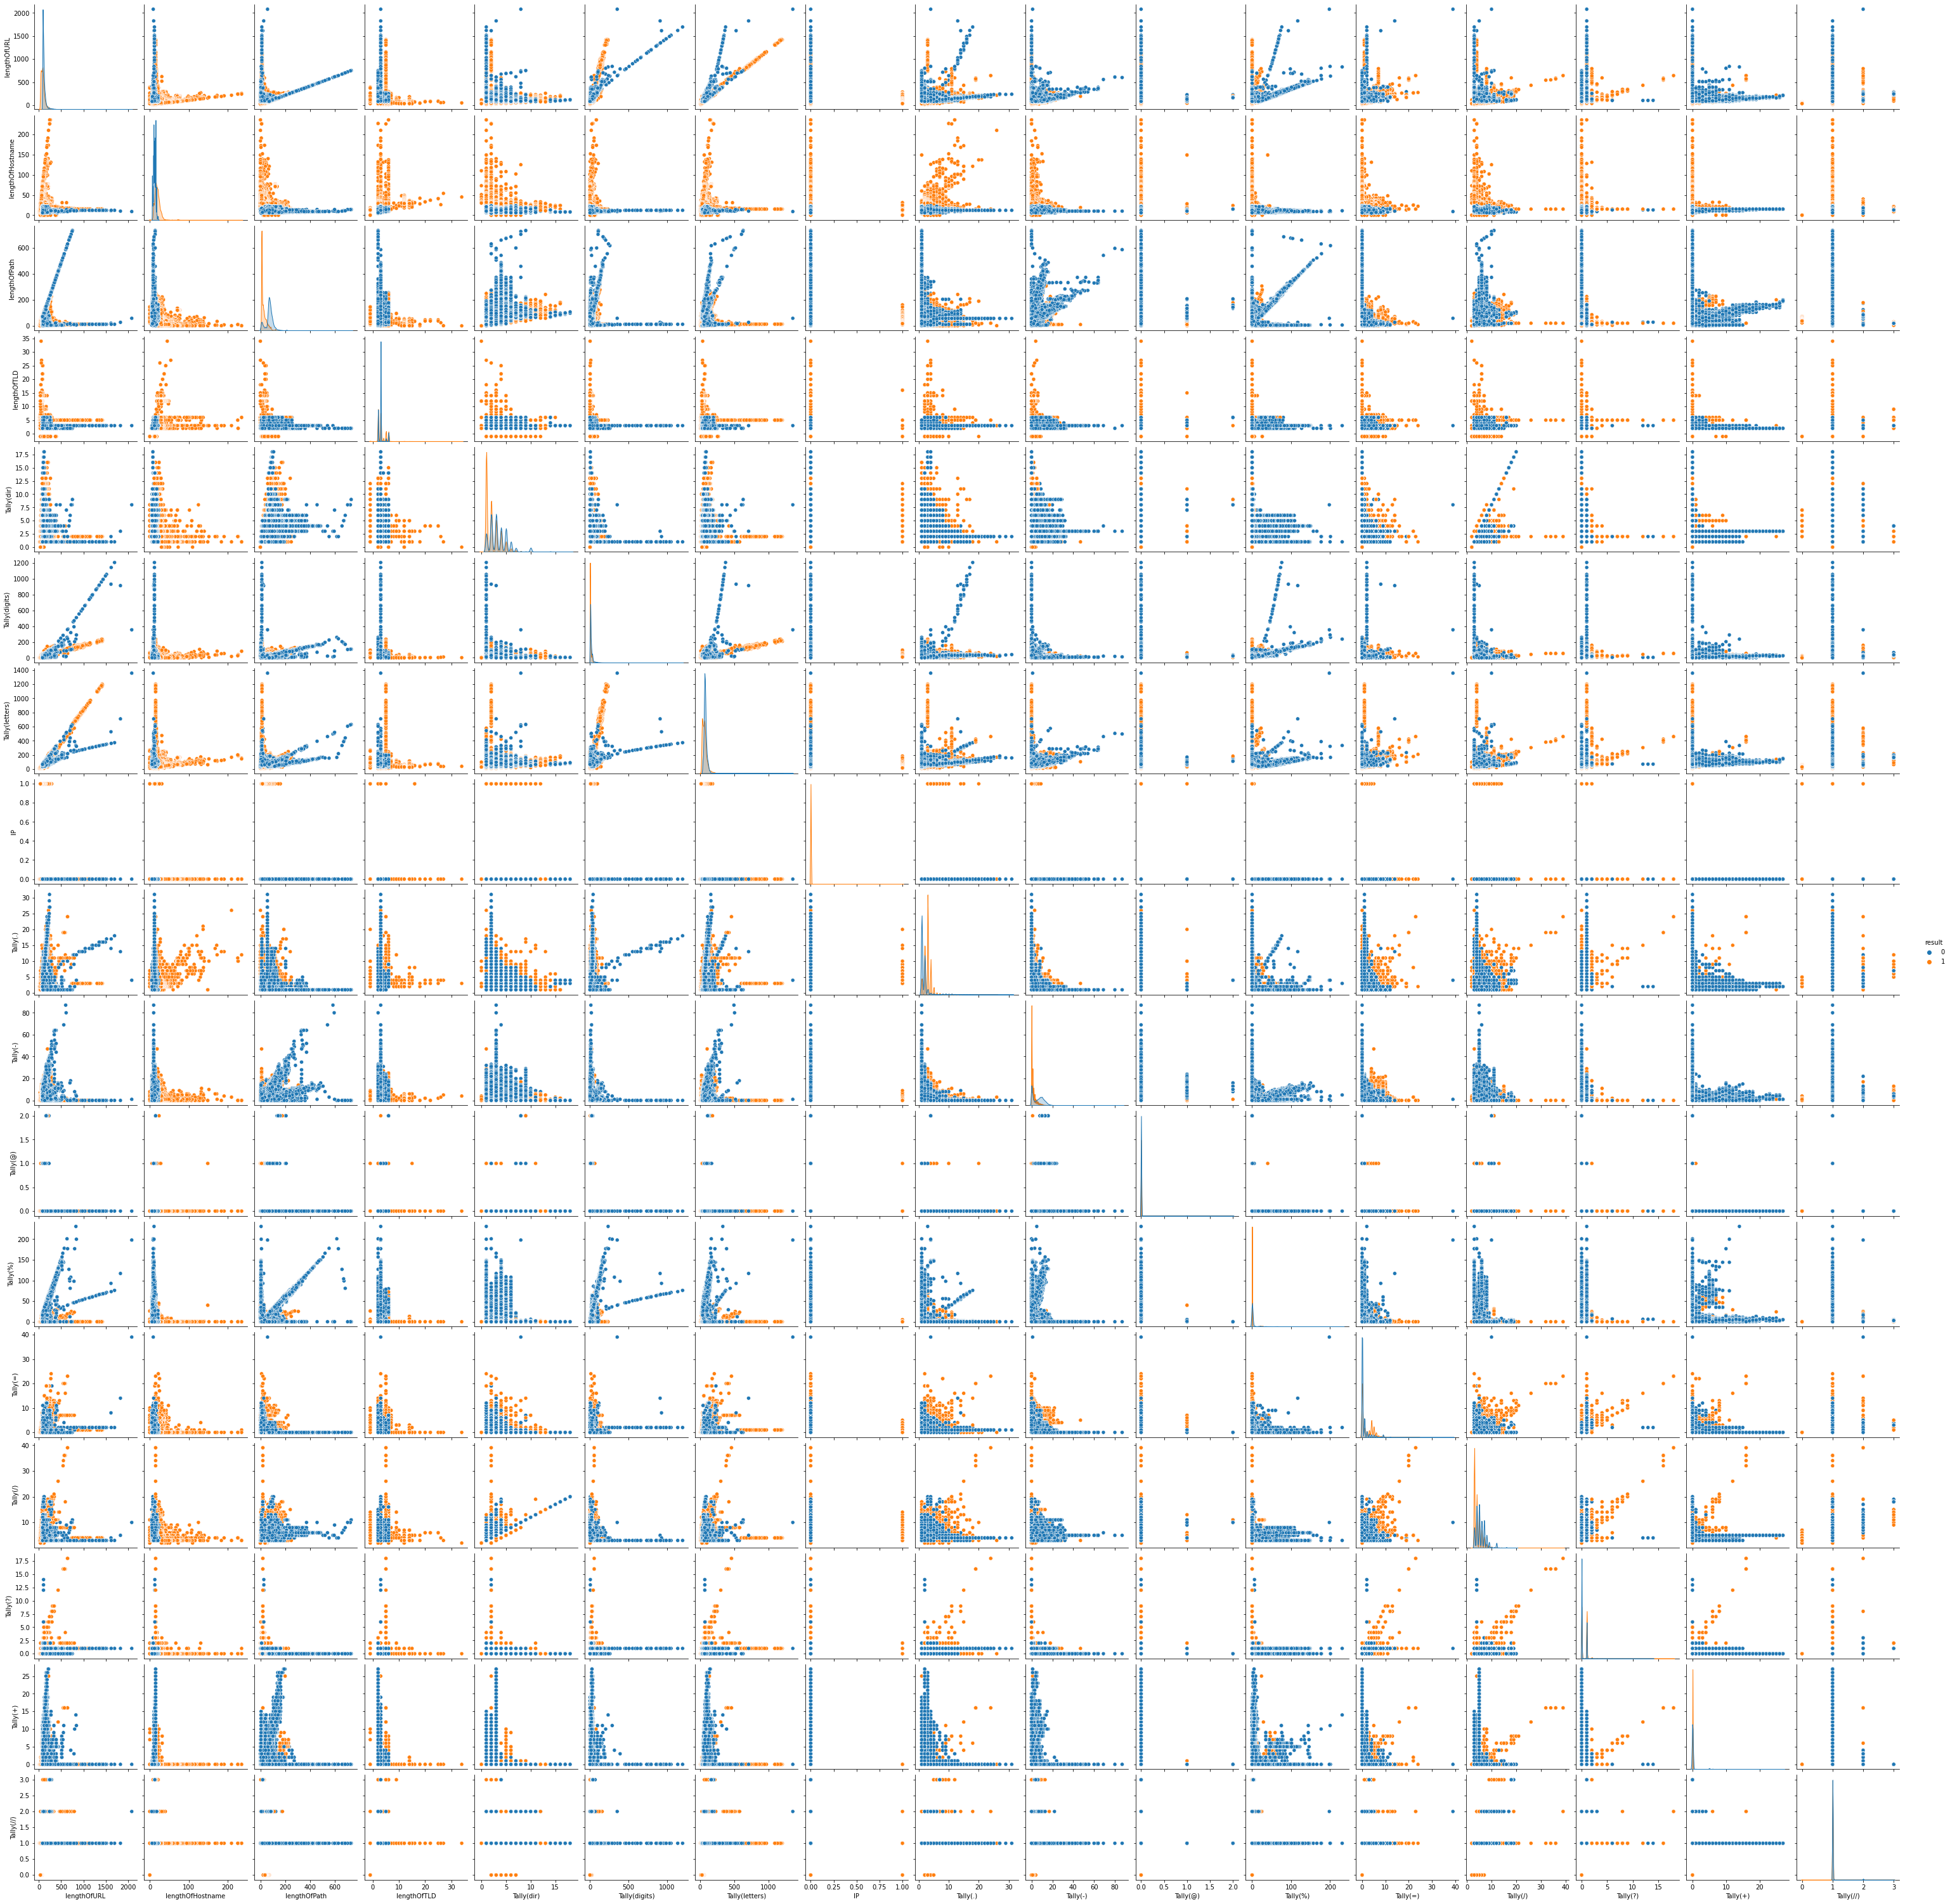

In [52]:
sns.pairplot(new_dataset, hue="result")

In [22]:
#new_dataset.to_csv('extracted_features.csv')

## Testing dataset (Real-World Data) Feature Extraction

In [23]:
urls = pd.read_csv("testing_data.csv")
urls

Unnamed: 0                                                url  \
0                0                             https://www.google.com   
1                1                            https://www.youtube.com   
2                2                           https://www.facebook.com   
3                3                              https://www.baidu.com   
4                4                          https://www.wikipedia.org   
...            ...                                                ...   
450171      450171        http://ecct-it.com/docmmmnn/aptgd/index.php   
450172      450172  http://faboleena.com/js/infortis/jquery/plugin...   
450173      450173  http://faboleena.com/js/infortis/jquery/plugin...   
450174      450174                             http://atualizapj.com/   
450175      450175  http://writeassociate.com/test/Portal/inicio/I...   

            label  result  
0          benign       0  
1          benign       0  
2          benign       0  
3          benign       0  
4          benign       0  
...           ...     ...  
450171  malicious       1  
450172  malicious       1  
450173  malicious       1  
450174  malicious       1  
450175  malicious       1  

[450176 rows x 4 columns]

In [24]:
urls['lengthOfURL']=urls['url'].apply(lambda i: len(str(i)))
urls['lengthOfHostname']=urls['url'].apply(lambda i: len(urlparse(i).netloc))
urls['lengthOfPath']=urls['url'].apply(lambda i: len(urlparse(i).path))
urls['tld'] = urls['url'].apply(lambda i: get_tld(i,fail_silently=True))
urls['lengthOfTLD'] = urls['tld'].apply(lambda i: tld_length(i))
urls=urls.drop(columns=['tld'])
urls['Tally(dir)'] = urls['url'].apply(lambda i: directories(i))
urls['Tally(digits)']= urls['url'].apply(lambda i: digit(i))
urls['Tally(letters)']= urls['url'].apply(lambda i: letter(i))
urls['IP'] = urls['url'].apply(lambda i: ip_address(i))
urls['Tally(.)'] = urls['url'].apply(lambda i: i.count('.'))
urls['Tally(-)'] = urls['url'].apply(lambda i: i.count('-'))
urls['Tally(@)'] = urls['url'].apply(lambda i: i.count('@'))
urls['Tally(%)'] = urls['url'].apply(lambda i: i.count('%'))
urls['Tally(=)'] = urls['url'].apply(lambda i: i.count('='))
urls['Tally(/)'] = urls['url'].apply(lambda i: i.count('/'))
urls['Tally(?)'] = urls['url'].apply(lambda i: i.count('?'))
urls['Tally(+)'] = urls['url'].apply(lambda i: i.count('+'))
urls['Tally(//)'] = urls['url'].apply(lambda i: i.count('//'))

In [25]:
urls = urls.drop(['Unnamed: 0'],axis=1)
urls.head()

url   label  result  lengthOfURL  lengthOfHostname  \
0     https://www.google.com  benign       0           22                14   
1    https://www.youtube.com  benign       0           23                15   
2   https://www.facebook.com  benign       0           24                16   
3      https://www.baidu.com  benign       0           21                13   
4  https://www.wikipedia.org  benign       0           25                17   

   lengthOfPath  lengthOfTLD  Tally(dir)  Tally(digits)  Tally(letters)  IP  \
0             0            3           0              0              17   0   
1             0            3           0              0              18   0   
2             0            3           0              0              19   0   
3             0            3           0              0              16   0   
4             0            3           0              0              20   0   

   Tally(.)  Tally(-)  Tally(@)  Tally(%)  Tally(=)  Tally(/)  Tally(?)  \
0         2         0         0         0         0         2         0   
1         2         0         0         0         0         2         0   
2         2         0         0         0         0         2         0   
3         2         0         0         0         0         2         0   
4         2         0         0         0         0         2         0   

   Tally(+)  Tally(//)  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         0          1

In [26]:
#urls.to_csv('testing_feature_extraction.csv')